<a href="https://colab.research.google.com/github/punkmic/unsupervised-Sentiment-Analysis---Comparisen-analysis/blob/master/Unsupervised_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intro**

## **Install Dependecies**

In [ ]:
 
# install dependecies here
!pip install langdetect  # for language detection
!pip install diagrams # for visualize the workflow
!pip install graphviz # for visualize the workflow
!pip install textblob # for unsupervised sentiment analysis
!pip install wordcloud # for wordcloud plot
!pip install matplotlib # for plot
!pip install Pillow # for image manipulation
!pip install nltk # for natural language prepocessing
!pip install enelvo # for fix slangs, abbreviations, spelling errors
!pip install gensim # for machile learning
!pip install tabulate # for print as table
!pip install transformers # for machine learning
!pip install numpy==1.21.6 # for mathematical
!pip install pyldavis # for model visualization

## **Load Depencies**

In [ ]:
# load dependecies here
from langdetect import detect as dt
from diagrams import Diagram as dg
import pandas as pd
from PIL import Image
import os 
import matplotlib.pyplot as plt
import nltk
from tabulate import tabulate

## **Load Dataset**

### **Clone Github repository** 

In [ ]:
# Files cloned from github may not automatically appear in files tab in this case right click and choose update
# this will update our files.
!git clone https://github.com/punkmic/unsupervised-Sentiment-Analysis---Comparisen-analysis.git
%cd /content/unsupervised-Sentiment-Analysis---Comparisen-analysis
!ls

fatal: destination path 'unsupervised-Sentiment-Analysis---Comparisen-analysis' already exists and is not an empty directory.
/content/unsupervised-Sentiment-Analysis---Comparisen-analysis
app.py		   Makefile	     results
clear_datasets.py  __pycache__	     Unsupervised_Sentiment_Analysis.ipynb
Drivers		   README.md	     webscraping.py
LICENSE		   requirements.txt  wordclouds


In [ ]:
# !git pull 

### **Load csv file**

In [ ]:
PATH_TO_CSV = '/content/unsupervised-Sentiment-Analysis---Comparisen-analysis/results/web_scraping_results.csv'
df = pd.read_csv(PATH_TO_CSV, encoding='utf-8')
# lower colnames 
df.rename(columns={'Title':'title', 'Body':'body'}, inplace=True)
df.head()

,title,body
0,Recebi um e-mail que parte do pedido não foi p...,Olá!Preciso da ajuda de vocês para entender qu...
1,Produto falsificado e não me deixam devolver,COMPREI UM PERFUME E QUANDO RECEBI O PRODUTO N...
2,COBRANDO CONTEUDO DIGITAL sem solicitação,"Novamente estava em casa, quando terminei de a..."
3,Cobrança indevida,Fiz a assinatura da amazon prime video no valo...
4,Troquei de telefone e consigo acessar minha conta,"Prezados,Tenho uma conta na Amazon ao qual já ..."


### **Plot some statistics of text**

In [ ]:
df.describe()

,title,body
count,10,10
unique,10,10
top,Recebi um e-mail que parte do pedido não foi p...,Olá!Preciso da ajuda de vocês para entender qu...
freq,1,1


## **Plot wordcloud**

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
# print currently directory
!pwd

/content/unsupervised-Sentiment-Analysis---Comparisen-analysis


In [ ]:
# create a new directory for wordclouds
wordclouds = '/content/unsupervised-Sentiment-Analysis---Comparisen-analysis/results/wordclouds/'
!mkdir wordclouds

mkdir: cannot create directory ‘wordclouds’: File exists


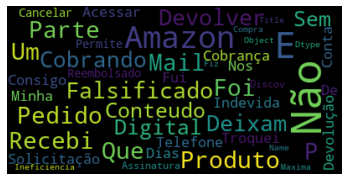

In [ ]:
# Create and generate a word cloud image:
text = str(df['title']).title()
wordcloud = WordCloud(max_font_size=50, max_words=100,  stopwords=STOPWORDS).generate(text)

# Save wordcloud 
wordcloud.to_file('wordclouds/title_wordcloud.png')

# Display wordcloud
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



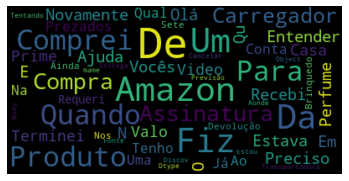

In [ ]:

# Create and generate a word cloud image:
text = str(df['body']).title()
wordcloud = WordCloud(max_font_size=50, max_words=100).generate(text)

# Save wordcloud 
wordcloud.to_file('wordclouds/body_wordcloud.png')

# Display wordcloud
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



## **Text Pre-Processing**

Guide
* Lower Case conversion
* Removing Punctuations
* Stop Words Removal
* Rare Words Removal
* Spelling correction
* Tokenization
* Lemmatization



### **Apply enelvo - Normalize noisy words, lowercase the words and remove punctuation.**
Enelvo is a tool for normalising noisy words in user-generated content written in Portuguese -- such as tweets, blog posts, and product reviews. It is capable of identifying and normalising spelling mistakes, internet slang, acronyms, proper nouns, and others.

In [ ]:
from enelvo.normaliser import Normaliser
norm = Normaliser(tokenizer='readable', sanitize=True)

In [ ]:
def normalising(text):
  """ Normalising noisy words in user-generated content written in Portuguese """
  text_norm =norm.normalise(text)
  return text_norm.lower()

### **Tokenizing**

In [ ]:
from nltk.tokenize import word_tokenize
# We need this dataset in order to use the tokenizer
nltk.download('punkt')
import string

def tokenize(text):
  """ Convert text to lowercase and split to a list of words """
  tokens = word_tokenize(text)
  filtered_tokens = [token for token in tokens ] # if token not in string.punctuation
  return filtered_tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### **Remove stop words**

In [ ]:
from nltk.corpus import stopwords
# download stop words
nltk.download('stopwords')

def remove_stop_words(tokens):
  """ Remove stop words """
  portuguese_stop_words = stopwords.words('portuguese')
  tokens_wo_stop_words = [word for word in tokens if word not in portuguese_stop_words]
  return tokens_wo_stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **Word Stemming**

In [ ]:
from nltk.stem import SnowballStemmer
def stemming(tokens):
  """ Stemming text """
  stemmer = SnowballStemmer('portuguese') 
  stemmed_words = [stemmer.stem(word) for word in tokens]
  return stemmed_words

### **Process text**

In [ ]:
def process_text(text):
   text_norm = normalising(text)
   tokens = tokenize(text_norm)
   tokens_wo_stop_words = remove_stop_words(tokens)
   return stemming(tokens_wo_stop_words)

In [ ]:
texts = df['body'].map(process_text)
texts[:1]

0    [olá, precis, ajud, entend, problem, receb, em...
Name: body, dtype: object

### **Create a dictionary using the bag of words model**
- Document: some text.
- Corpus: a collection of documents.

In [ ]:
from gensim import corpora

# associate each word in the corpus with a unique integer ID.
dictionary = corpora.Dictionary(texts)

# filter out tokens that appear in less than 2 documents 
# filter out tokens that appear in more than 0.9 documents (fraction of total corpus size, not absolute number).
# keep only the first 100000 most frequent tokens.
dictionary.filter_extremes(no_below=3, no_above=0.5, keep_n=100000)

# create the bag-of-word representation for documents
corpus = [dictionary.doc2bow(text) for text in texts]

print(f'Number of unique tokens: {len(dictionary)}')
print(f'Number of documents: {len(corpus)}')

Number of unique tokens: 18
Number of documents: 10


### **Preview Bag Of Words**

In [ ]:
# print how many times each word appear
bow_doc = corpus[0] 
table = []
for i in range(len(bow_doc)):
    index = bow_doc[i][0]
    word = dictionary[bow_doc[i][0]]
    times = bow_doc[i][1]
    table.append([word, times])
print(tabulate(table,headers=["Word", "Frequency"], tablefmt="github"))

| Word   |   Times |
|--------|---------|
| cobr   |       2 |
| ped    |       1 |
| valor  |       3 |


## **Topic Modeling**

In [ ]:
# setup visulization
import pyLDAvis.gensim_models as gensimvis

def visualize_model(model):
  return gensimvis.prepare(model, corpus, dictionary)

### **Latent Dirichlet Allocation (LDA) model**

In [ ]:
from gensim import models
from gensim.models.callbacks import PerplexityMetric, ConvergenceMetric, CoherenceMetric

# Set up the callbacks loggers
perplexity_logger = PerplexityMetric(corpus=corpus, logger='shell')
convergence_logger = ConvergenceMetric(logger='shell')
coherence_cv_logger = CoherenceMetric(corpus=corpus, logger='shell', coherence = 'c_v', texts = texts)

NUM_TOPICS = 5
iterations = 50
passes = 50

# train model
lda_model = models.ldamodel.LdaModel(corpus=corpus,
            id2word=dictionary,
            num_topics=NUM_TOPICS,
            eval_every=10,
            iterations=iterations,
            passes=passes,
            callbacks=[convergence_logger, perplexity_logger, coherence_cv_logger])

# Save models so they aren't lost
if not os.path.exists(f"models/lda_{iterations}i50p/"):
   os.makedirs(f"models/lda_{iterations}i50p/")

lda_model.save(f"models/lda_{iterations}i50p/lda_{iterations}i50p.model")

In [ ]:
# print the score and topics in one document sorted by topic score
for index, score in sorted(lda_model[corpus[5]], key=lambda x:x[1], reverse=True):
    print(f"\nScore: {score}\t \nTopic: {lda_model.print_topic(index, 8)}")


Score: 0.7135381698608398	 
Topic: 0.150*"produt" + 0.124*"devolu" + 0.095*"valor" + 0.095*"dias" + 0.086*"porém" + 0.065*"quer" + 0.065*"assinatur" + 0.065*"cobr"

Score: 0.24004164338111877	 
Topic: 0.158*"pois" + 0.140*"nad" + 0.121*"send" + 0.120*"nov" + 0.083*"outr" + 0.057*"porém" + 0.050*"produt" + 0.045*"pod"

Score: 0.015601587481796741	 
Topic: 0.221*"produt" + 0.136*"valor" + 0.136*"dinheir" + 0.093*"ped" + 0.093*"dias" + 0.093*"cobr" + 0.051*"quer" + 0.051*"devolu"

Score: 0.015422102063894272	 
Topic: 0.387*"cancel" + 0.118*"cobr" + 0.118*"assinatur" + 0.064*"pod" + 0.064*"quer" + 0.064*"inform" + 0.064*"outr" + 0.011*"devolu"

Score: 0.015396473929286003	 
Topic: 0.056*"valor" + 0.056*"cancel" + 0.056*"produt" + 0.056*"cobr" + 0.056*"assinatur" + 0.056*"pod" + 0.056*"ped" + 0.056*"outr"


### **Visualization of topics**

In [ ]:
visualize_model(lda_model)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.163697 -0.113239       1        1  26.239729
0     -0.096932 -0.093872       2        1  23.790111
4     -0.183093  0.057051       3        1  22.673465
1      0.163955  0.127753       4        1  18.004123
2     -0.047627  0.022307       5        1   9.292572, topic_info=         Term      Freq     Total Category  logprob  loglift
17     cancel  8.000000  8.000000  Default  18.0000  18.0000
9      produt  9.000000  9.000000  Default  17.0000  17.0000
2       valor  6.000000  6.000000  Default  16.0000  16.0000
5     dinheir  4.000000  4.000000  Default  15.0000  15.0000
4        dias  5.000000  5.000000  Default  14.0000  14.0000
..        ...       ...       ...      ...      ...      ...
11  assinatur  0.141062  5.031254   Topic5  -4.0599  -1.1983
4        dias  0.141063  5.049863   Topic5  -4.0599  -1.2020
3      devolu  0.141063  5.061837   Topic5  -4.0599  -1.2043
0        cobr  0.141063  5.868457   Topic5  -4.0599  -1.3522
2       valor  0.141061  6.678350   Topic5  -4.0599  -1.4815

[108 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
11        1  0.596273  assinatur
11        4  0.397515  assinatur
17        2  0.120031     cancel
17        4  0.720187     cancel
17        5  0.120031     cancel
0         1  0.681610       cobr
0         4  0.340805       cobr
3         2  0.592670     devolu
3         3  0.395113     devolu
4         2  0.198025       dias
4         3  0.792101       dias
5         3  0.739106    dinheir
5         5  0.246369    dinheir
6         2  0.297164     inform
6         3  0.297164     inform
6         4  0.297164     inform
7         1  0.203750        nad
7         2  0.407500        nad
7         3  0.203750        nad
7         5  0.203750        nad
12        1  0.297841        nov
12        2  0.595682        nov
13        1  0.311408       outr
13        4  0.311408       outr
13        5  0.311408       outr
1         1  0.311410        ped
1         2  0.311410        ped
1         5  0.311410        ped
8         1  0.298402        pod
8         3  0.298402        pod
8         4  0.298402        pod
14        1  0.246135       pois
14        2  0.492271       pois
14        5  0.246135       pois
16        1  0.237605      porém
16        2  0.712814      porém
9         2  0.304465     produt
9         3  0.507442     produt
9         5  0.202977     produt
10        1  0.238300       quer
10        3  0.476601       quer
10        4  0.238300       quer
15        1  0.476794       send
15        2  0.476794       send
2         1  0.898426      valor, R=18, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 5, 2, 3])

### **Evaluating LDA model**

In [ ]:
# perplexity is the measure of uncertainty, meaning lower the perplexity better the model.
print('Perplexity: ', lda_model.log_perplexity(corpus))

# Coherence is the measure of semantic similarity between top words in our topic. Higher the coherence better the model performance.
coherence_model_lda = models.CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Perplexity:  -3.2547879523851653
Coherence Score:  0.2277093782522118


### **TF-IDF model**

The tf-idf model transforms vectors from the bag-of-words representation to a vector space where the frequency counts are weighted according to the relative rarity of each word in the corpus.

More rarity a word is more weighted a word is.

In [ ]:
# train the model
tfidf_model = models.TfidfModel(corpus, id2word=dictionary)

In [ ]:
# print the weight of each word in one document sorted by weight
table = []
for id, weight in sorted(tfidf_model[corpus[5]], key=lambda x: x[1], reverse=True):
    word = dictionary[id]
    table.append([word, weight])
print(tabulate(table, headers=["Word", "TF-IDF Weight"], tablefmt="github"))

| Word   |   TF-IDF Weight |
|--------|-----------------|
| devolu |        0.702508 |
| porém  |        0.468338 |
| produt |        0.26963  |
| dias   |        0.234169 |
| inform |        0.234169 |
| nov    |        0.234169 |
| pois   |        0.178216 |
| nad    |        0.134815 |


### **Visualize topics**

In [ ]:
# code

### **Evaluate model**

In [ ]:
# code

### **Latent Semantic Analysis (LSA) model** 

In [ ]:
# convert the vector from (bag-of-words integer counts) to (TfIdf real-valued weights)
tfidf_corpus = tfidf_model[corpus]

# train the model
lsa_model = models.LsiModel(tfidf_corpus, id2word=dictionary, num_topics=300)

In [ ]:
# print the weight of each word in one document sorted by weight
table = []
for id, weight in sorted(lsa_model[corpus[2]], key=lambda x: x[1], reverse=True):
    word = dictionary[id]
    table.append([word, weight])
print(tabulate(table, headers=["Word", "Weight"], tablefmt="github"))

| Word    |     Weight |
|---------|------------|
| cobr    |  1.58325   |
| dias    |  0.274664  |
| produt  | -0.0352346 |
| dinheir | -0.197004  |
| pod     | -0.244301  |
| nad     | -0.413086  |
| devolu  | -0.488866  |
| inform  | -0.809174  |
| valor   | -1.28702   |
| ped     | -1.57508   |


### **Evaluate model**

In [ ]:
# Coherence is the measure of semantic similarity between top words in our topic. Higher the coherence better the model performance.
coherence_model_lsa = models.CoherenceModel(model=lsa_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lsa = coherence_model_lsa.get_coherence()
print('Coherence Score: ', coherence_lsa)

Coherence Score:  0.22770937825221177


### **Random Projections, RP**

In [ ]:
num_topics = len(dictionary)
rp_model = models.RpModel(tfidf_corpus, num_topics=num_topics)

In [ ]:
# print the weight of each word in one document sorted by weight
table = []
for id, weight in sorted(rp_model[tfidf_corpus[5]], key=lambda x: x[1], reverse=True):
    word = dictionary[id]
    table.append([word, weight])
print(tabulate(table, headers=["Word", "Weight"], tablefmt="github"))

| Word      |     Weight |
|-----------|------------|
| outr      |  0.515336  |
| produt    |  0.4685    |
| pois      |  0.2741    |
| cobr      |  0.193831  |
| dias      |  0.146995  |
| assinatur |  0.146995  |
| nov       |  0.0570656 |
| pod       |  0.0366063 |
| cancel    | -0.0102297 |
| devolu    | -0.100159  |
| inform    | -0.163711  |
| quer      | -0.231007  |
| dinheir   | -0.247723  |
| porém     | -0.257383  |
| send      | -0.2741    |
| valor     | -0.2741    |
| ped       | -0.341395  |
| nad       | -0.358111  |


### **Evaluate model**

### **Hierarchical Dirichlet Process, HDP** 

In [ ]:
hp_model = models.HdpModel(corpus, id2word=dictionary)

In [ ]:
table = []
for id, weight in sorted(hp_model[corpus[5]], key=lambda x: x[1], reverse=True):
  word = dictionary[id]
  table.append([word,weight])
print(tabulate(table, headers=["Word", "Weight"], tablefmt="github"))

| Word   |    Weight |
|--------|-----------|
| devolu | 0.929559  |
| cobr   | 0.0199364 |
| ped    | 0.0147113 |
| valor  | 0.0106601 |


### **Evaluate model**

In [ ]:
# Coherence is the measure of semantic similarity between top words in our topic. Higher the coherence better the model performance.
coherence_model_hp = models.CoherenceModel(model=hp_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_hp = coherence_model_hp.get_coherence()
print('Coherence Score: ', coherence_hp)

Coherence Score:  0.2277093782522117


### **BERTimbau**

In [ ]:
from transformers import AutoModel, AutoTokenizer

In [ ]:
# BERT Base
tokenizer = AutoTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased')
model = AutoModel.from_pretrained('neuralmind/bert-base-portuguese-cased')

Some weights of the model checkpoint at neuralmind/bert-base-portuguese-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### **Texblob**

In [ ]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sid = SentimentIntensityAnalyzer()

In [ ]:
def get_blob_sentiment(sentence):
  blob = TextBlob(sentence).sentiment
  return blob.polarity

### **Vader**

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
def get_vader_sentiment(sentence):
  vader = sid.polarity_scores(sentence)
  return vader['compound']

In [ ]:
df['TextBlob'] = df['body'].apply(lambda sentence: get_blob_sentiment(sentence))
df['Vader'] = df['body'].apply(lambda sentence: get_vader_sentiment(sentence))

A negative sentiment score means 
negative sentiment, and a positive sentiment score means positive sentiment. The higher 
the absolute value of the score, the more confident the system is about it

In [ ]:
df.head(10)

,title,body,TextBlob,Vader
0,Recebi um e-mail que parte do pedido não foi p...,Olá!Preciso da ajuda de vocês para entender qu...,0.0,0.0000
1,Produto falsificado e não me deixam devolver,COMPREI UM PERFUME E QUANDO RECEBI O PRODUTO N...,0.2,0.0000
2,COBRANDO CONTEUDO DIGITAL sem solicitação,"Novamente estava em casa, quando terminei de a...",0.0,-0.4019
3,Cobrança indevida,Fiz a assinatura da amazon prime video no valo...,0.0,-0.1280
4,Troquei de telefone e consigo acessar minha conta,"Prezados,Tenho uma conta na Amazon ao qual já ...",0.0,0.0516
5,Devolução nos 7 dias,Requeri a devolução do produto ainda nos sete ...,0.0,0.6705
6,Não fui reembolsado,"Fiz a compra de um brinquedo, a transportadora...",0.0,0.1779
7,Amazon não permite cancelar assinatura Discov...,Estou tentando cancelar a assinatura da Discov...,0.0,-0.1280
8,Ineficiencia Maxima,Comprei um carregador Fonte Carregador para No...,-0.1,-0.2695
9,Fiz compra Amazon,Fiz compra Amazon aonde previsão de entrega de...,0.5,-0.1280


### **Clustering sentences with K-Means**

In [ ]:
import re
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.probability import FreqDist
from sklearn.model_selection import train_test_split

## **Save Models to Google Cloud Storage**

In [ ]:
# import google cloud dependencies
#from google.colab import auth
#import uuid # for generate a unique identification for google bucket
# Define a project id in google cloud
#project_id = '<project_ID>'

#auth.authenticate_user()
# configure gsutil
## !gcloud config set project {project_id}
# set bucket name
##backet_name = f'sample-bucket-{uuid.uuid1()}'
## !gsuit mb gs://{bucket_name}

In [ ]:
# upload model to Google Cloud Storage
#!gsuit cp /tmp/name_of_file.txt gs://{bucket_name}/

# location of model
#download_location = f"https://console.cloud.google.com/storage/browser?project={project_id}"

# donwload model from Google Cloud Storage
#!gsuit cp gs://{bucket_name}/{filename} {download_location}

## **References**


[LangDetect](https://pypi.org/project/langdetect/) <br/>
[Diagrams](https://pypi.org/project/diagrams/) <br/>
[Graphviz](https://pypi.org/project/graphviz/) <br/>
[Beautifulsoap4](https://pypi.org/project/beautifulsoup4/) <br/>
[OpLexicon](https://www.inf.pucrs.br/linatural/wordpress/recursos-e-ferramentas/oplexicon/)